# Task for session2_cont and session3: 
## Edge-Preserving Denoising Filters & Feature Matching

**Instructions:**  
**please dont use .py to solve this task, just use tasks2.ipynb and edit the cells.**
- After forking the [SkyXperts-Vision-Course repo](https://github.com/ffathy-tdx/SkyXperts-Vision-Course) on GitHub. (you should have already dont this in the last session & uploaded task1)
- Go to your fork of the repo on GitHub.
- At the top, look for a yellow box that says “This branch is X commits behind…”
- Click the Sync fork or Update branch button.
The new task will show up in your tasks/ folder.  
- Upload your task to your forked repo (like you've done with task1 before)
---

## 1. DoG, LoG, and Edge-Preserving Denoising Filters

**Task:**
- Briefly read the descriptions below, then apply each filter to `'sample.jpg'` (or any test image you choose).
- Compare the results visually and write your observations.

**Background:**
- **DoG (Difference of Gaussian):** Used for edge detection by subtracting two blurred versions of the image (with different Gaussian sigmas).
- **LoG (Laplacian of Gaussian):** Uses a single Gaussian blur followed by Laplacian to highlight regions of rapid intensity change (edges).
- **Edge-Preserving Denoising (Bilateral Filter):** Smooths image while preserving edges (unlike simple Gaussian blur). You've already used this at the end of task1.

---

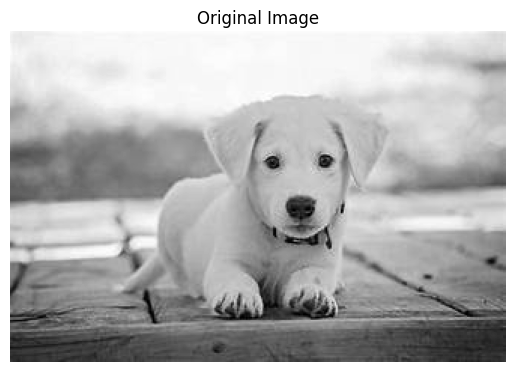

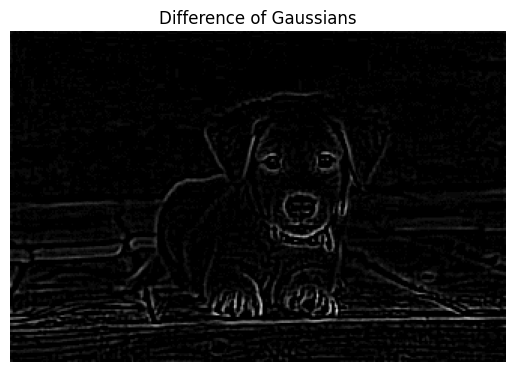

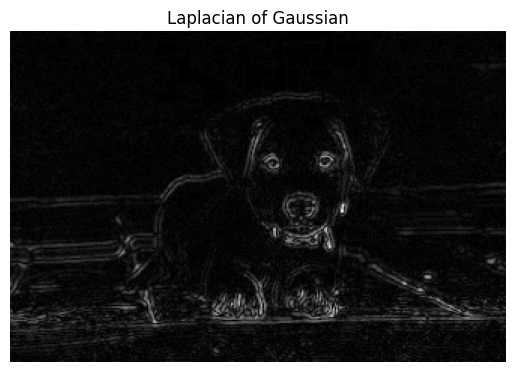

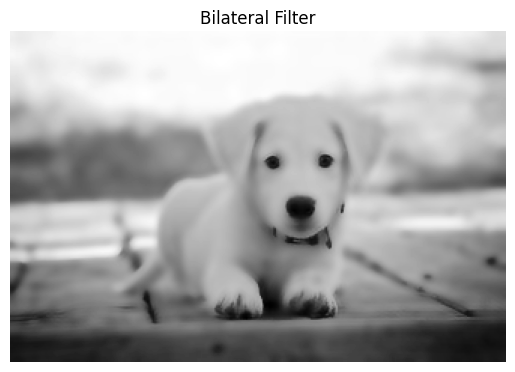

In [10]:
# Import required libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image
img = cv2.imread('OIP.jpeg', 0)  # Use grayscale for filtering
plt.imshow(img, cmap='gray'); plt.axis('off'); plt.title('Original Image'); plt.show()

# TODO: Apply DoG
blur1 = cv2.GaussianBlur(img, (5,5), 1)   # small sigma
blur2 = cv2.GaussianBlur(img, (5,5), 2)   # larger sigma
DoG = cv2.subtract(blur1, blur2)
plt.imshow(DoG, cmap='gray')
plt.axis('off')
plt.title('Difference of Gaussians')
plt.show()

# TODO: Apply LoG
log1 = cv2.GaussianBlur(img, (5,5), 1)           
log = cv2.Laplacian(log1, cv2.CV_64F)             
log = cv2.convertScaleAbs(log)                   
plt.imshow(log, cmap='gray')
plt.axis('off')
plt.title('Laplacian of Gaussian')
plt.show()


# TODO: Apply bilateral (edge-preserving) filter
bilateral = cv2.bilateralFilter(img, 9, 75, 75)
plt.imshow(bilateral, cmap='gray')
plt.axis('off')
plt.title('Bilateral Filter')
plt.show()
# Show all results for comparison

**Q1: What differences do you observe between DoG, LoG, and the edge-preserving filter?**

_Write your observations here._

## 2. Keypoints & Descriptors: SIFT vs. ORB

**Task:**
- Detect and plot keypoints on `'sample.jpg'` using SIFT and ORB.
- Compare the number and distribution of detected keypoints.

**Background:**
- **Keypoints:** Distinctive image points (corners/blobs) useful for matching.
- **Descriptors:** Vectors that describe local patches around keypoints for comparison/matching.

---

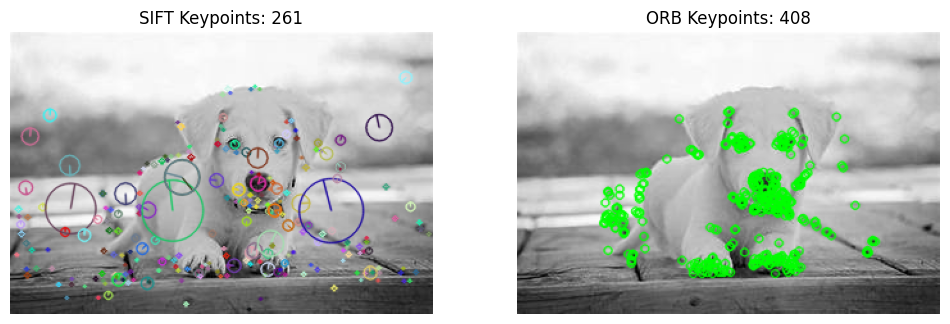

In [30]:
import cv2

img = cv2.imread('OIP.jpeg', 0)

# Detect and plot SIFT keypoints
sift = cv2.SIFT_create()
sift_keypoints, sift_descriptors = sift.detectAndCompute(img, None)
sift_img = cv2.drawKeypoints(img, sift_keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Detect and plot ORB keypoints
orb = cv2.ORB_create()
orb_keypoints, orb_descriptors = orb.detectAndCompute(img, None)
orb_img = cv2.drawKeypoints(img, orb_keypoints, None, color=(0,255,0), flags=0)

# TODO: Count and compare number of keypoints for SIFT and ORB
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(sift_img)
plt.axis('off')
plt.title(f'SIFT Keypoints: {len(sift_keypoints)}')
plt.subplot(1, 2, 2)
plt.imshow(orb_img)
plt.axis('off')
plt.title(f'ORB Keypoints: {len(orb_keypoints)}')
plt.show()


**Q2: How do the number and distribution of keypoints differ between SIFT and ORB?**

SIFT usually finds fewer keypoints than ORB, but they are more distinctive and spread out across the image at different scales. SIFT detects important points not only at corners ,giving a more balanced distribution. 
On the other hand,ORB often detects more keypoints (up to 500), but they are mostly concentrated around corners and edges.

## 3. Feature Matching with Descriptors

**Task:**
- Load a second image (e.g., `'sample2.jpg'`).
- Detect keypoints/descriptors using SIFT or ORB in both images.
- Match the features between the images using BFMatcher or FLANN.
- Plot the top matches.

**Background:**
- **Feature matching** helps recognize objects/scenes or estimate image transformations.

---

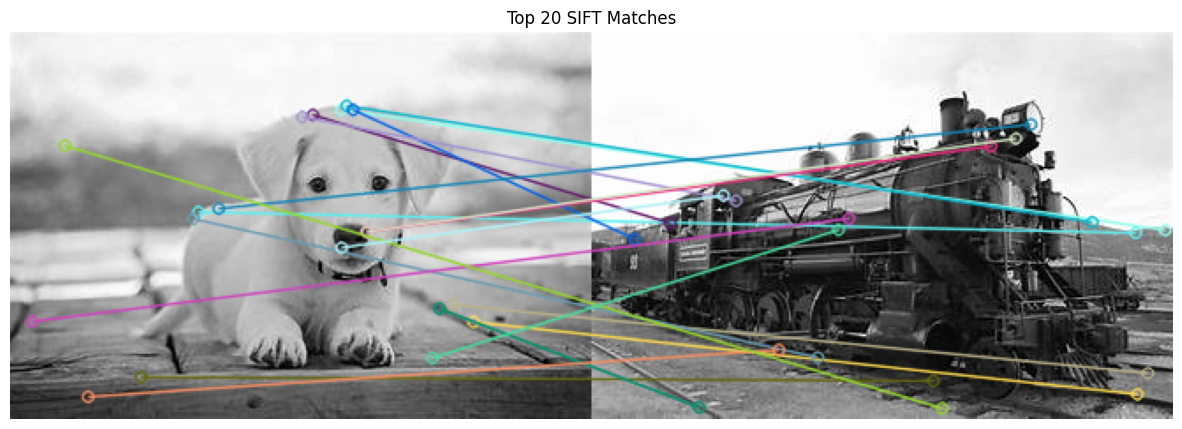

In [31]:
# Load second image
img2 = cv2.imread('OIP2.jpeg', 0)

# Detect SIFT keypoints/descriptors in both images
sift_keypoints2, descriptors2 = sift.detectAndCompute(img2, None)

# BFMatcher with default params
bf = cv2.BFMatcher()
matcher = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches = matcher.match(sift_descriptors, descriptors2)
matches = sorted(matches, key = lambda x:x.distance)
numberofmatches = 20
# Draw matches
img3 = cv2.drawMatches(img, sift_keypoints, img2, sift_keypoints2, matches[:numberofmatches], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.figure(figsize=(15, 10))
plt.imshow(img3)
plt.axis('off')
plt.title(f'Top {numberofmatches} SIFT Matches')
plt.show()
# bonus TODO: Try with ORB or FLANN if you like

**Q3: What do you notice about the feature matches? Are there any mismatches or errors? How might you improve the matching process?**

Some matches are correct, but there are also some wrong ones where features don’t match properly. This can happen because parts of the images look similar, or due to changes in lighting, size, or angle.
you can improve it by using a ratio test, FLANN matcher, or RANSAC to remove bad matches.

**Bonus Task (Optional, for extra credit):**
- Try using different image preprocessing steps *before* edge detection or feature extraction.
    - For example:
        - Add noise to your image (e.g., Gaussian noise, salt-and-pepper noise).
        - Apply a sharpening filter to your image.
    - Then, run DoG, LoG, or any edge-preserving filter and observe the changes.
- **What to do:**
    - Show the results (images/plots) for at least one type of preprocessing + edge detection.
    - Briefly explain:
        - How does noise affect edge maps or keypoints?
        - Does sharpening make features easier or harder to detect/match?

**You can add your code and observations in the cells below.**


In [ ]:
# Write your code here

_What are your observations?_
write them here

## 4. Reflection (Optional)

- What was the most challenging or interesting part of this task for you?
- Any feedback or thoughts?

_Write your reflection here._